<a href="https://colab.research.google.com/github/AlfinHeck/Deteksi_Gambar_Metode_CNN/blob/main/UAS_Kecerdasan_Buatan_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive/


In [ ]:
base_dir = 'rpc'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir,'val')

In [ ]:
#print(train_dir)
os.listdir('rpc')

['val', 'train']

In [ ]:
train_datagen = ImageDataGenerator(
            featurewise_center=True,
            featurewise_std_normalization=True,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True)
            #rescale = 1./255,
            #zoom_range=0.2,
            #rotation_range = 20,
            #horizontal_flip=True,
            #shear_range=0.2,
            #fill_mode='nearest')
test_datagen = ImageDataGenerator(
            featurewise_center=True,
            featurewise_std_normalization=True,
            rotation_range=20,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True)
            #rescale = 1./255,
            #zoom_range=0.2,
            #rotation_range = 20,
            #horizontal_flip=True,
            #shear_range=0.2,
            #fill_mode='nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
                    train_dir,  # direktori data latih,
                    target_size=(200, 300),  # mengubah resolusi seluruh gambar menjadi 200x300 piksel,
                    batch_size=4,
                    # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical',
                    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
                    val_dir, # direktori data validasi,
                    target_size=(200, 300), # mengubah resolusi seluruh gambar menjadi 200x300 piksel,
                    batch_size=4, # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical',
                    class_mode='categorical')

Found 126 images belonging to 3 classes.
Found 28 images belonging to 3 classes.


In [ ]:
 model = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 300, 3)),
                tf.keras.layers.MaxPooling2D(2, 2),
                tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                tf.keras.layers.MaxPooling2D(2,2),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(512, activation='relu'),
                tf.keras.layers.Dense(64, activation='relu'),
                tf.keras.layers.Dense(3, activation='softmax')
            ])

In [ ]:
[
model.compile(loss='categorical_crossentropy',
optimizer=tf.optimizers.Adam(lr=0.0001),
metrics=['accuracy'])
]

[None]

In [ ]:
h= model.fit( # melatih data validasi
train_generator,
steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
epochs=10,
validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
verbose=2)

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1871: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/10
25/25 - 66s - loss: 196.2257 - accuracy: 0.4100 - val_loss: 0.6090 - val_accuracy: 0.7500 - 66s/epoch - 3s/step
Epoch 2/10
25/25 - 55s - loss: 1.6601 - accuracy: 0.5918 - val_loss: 0.7595 - val_accuracy: 0.5500 - 55s/epoch - 2s/step
Epoch 3/10
25/25 - 49s - loss: 0.6404 - accuracy: 0.7347 - val_loss: 0.9413 - val_accuracy: 0.4000 - 49s/epoch - 2s/step
Epoch 4/10
25/25 - 50s - loss: 0.9889 - accuracy: 0.5408 - val_loss: 1.0044 - val_accuracy: 0.4000 - 50s/epoch - 2s/step
Epoch 5/10
25/25 - 49s - loss: 1.4564 - accuracy: 0.4286 - val_loss: 1.0106 - val_accuracy: 0.4000 - 49s/epoch - 2s/step
Epoch 6/10
25/25 - 52s - loss: 0.9599 - accuracy: 0.4286 - val_loss: 0.9378 - val_accuracy: 0.4000 - 52s/epoch - 2s/step
Epoch 7/10
25/25 - 51s - loss: 0.9348 - accuracy: 0.5102 - val_loss: 0.7723 - val_accuracy: 0.6000 - 51s/epoch - 2s/step
Epoch 8/10
25/25 - 54s - loss: 1.2703 - accuracy: 0.4800 - val_loss: 0.9541 - val_accuracy: 0.6500 - 54s/epoch - 2s/step
Epoch 9/10
25/25 - 51s - loss:

In [ ]:
import h5py
# save model to single file,
model.save('submission56.h5')

In [ ]:
#kalau runtime stop, tinggal load model
#model = tf.keras.models.load_model('submission5.h5')

Saving 8.jpg to 8 (1).jpg
1/1 [==============================] - 0s 252ms/step
8.jpg
Uzumaki Naruto


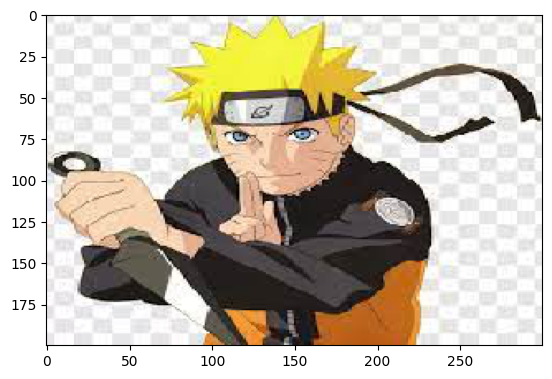

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
             
uploaded = files.upload()
             
for fn in uploaded.keys():
             
# predicting images
              path = fn
              img = image.load_img(path, target_size=(200,300))
              imgplot = plt.imshow(img)
              x = image.img_to_array(img)
              x = np.expand_dims(x, axis=0)
             
              images = np.vstack([x])
              classes = model.predict(images, batch_size=10)
              hasil = np.argmax(classes)
              print(fn)
              if hasil==0:
                print('Kobo Kanaeru')
              elif hasil==1:
                print('Uzumaki Naruto')
              else:
                print('Vestia Zeta')

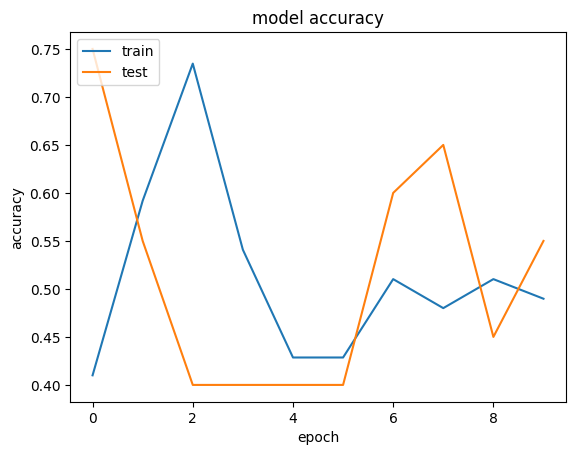

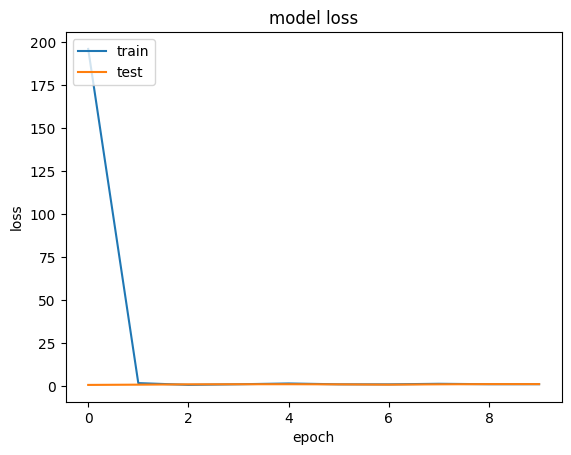

In [ ]:
plt.plot(h.history['accuracy'])    #model Grafik
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
        
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model = tf.keras.Sequential([  # Convolution filter sebanyak 64x

#Input layer
tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=[200, 300, 3]),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),

#Hidden layer
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
tf.keras.layers.Flatten(),
    
#Output layer
tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 198, 298, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 99, 149, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 97, 147, 32)       18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 48, 73, 32)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 48, 73, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 46, 71, 16)       